<a href="https://colab.research.google.com/github/7PAM2015-0105-2023-Group-18/Assign-2-Kaggle-Challenge/blob/main/Copy_of_Assign_2_Kaggle_Challenge_Group_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/kaggle challenge/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/kaggle challenge/test.csv")
train_df_copy = train_df.copy()
print(train_df.head(5))

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [ ]:
print(f"Column names: {list(train_df.columns)} \n")

print(f"train_ds shape: {train_df.shape} \n")

print(f"train_ds columns datatypes: {train_df.dtypes} \n")

print(f"missing values: {train_df.isnull().sum()} \n")

Column names: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported'] 

train_ds shape: (8693, 14) 

train_ds columns datatypes: PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object 

missing values: PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64 



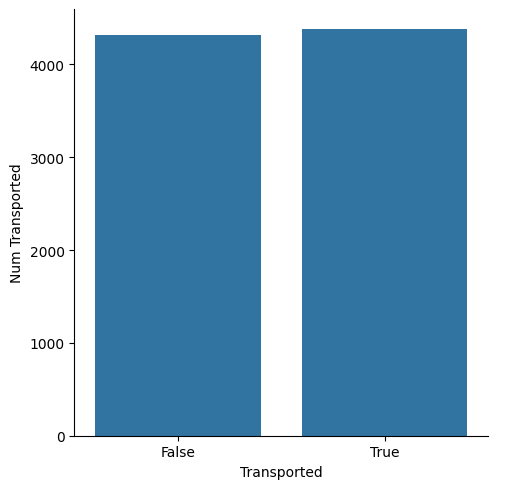

In [ ]:
ax = sns.catplot(x = "Transported", data = train_df, kind = "count")
ax.set_axis_labels("Transported", "Num Transported")

<Axes: title={'center': 'VIP'}>

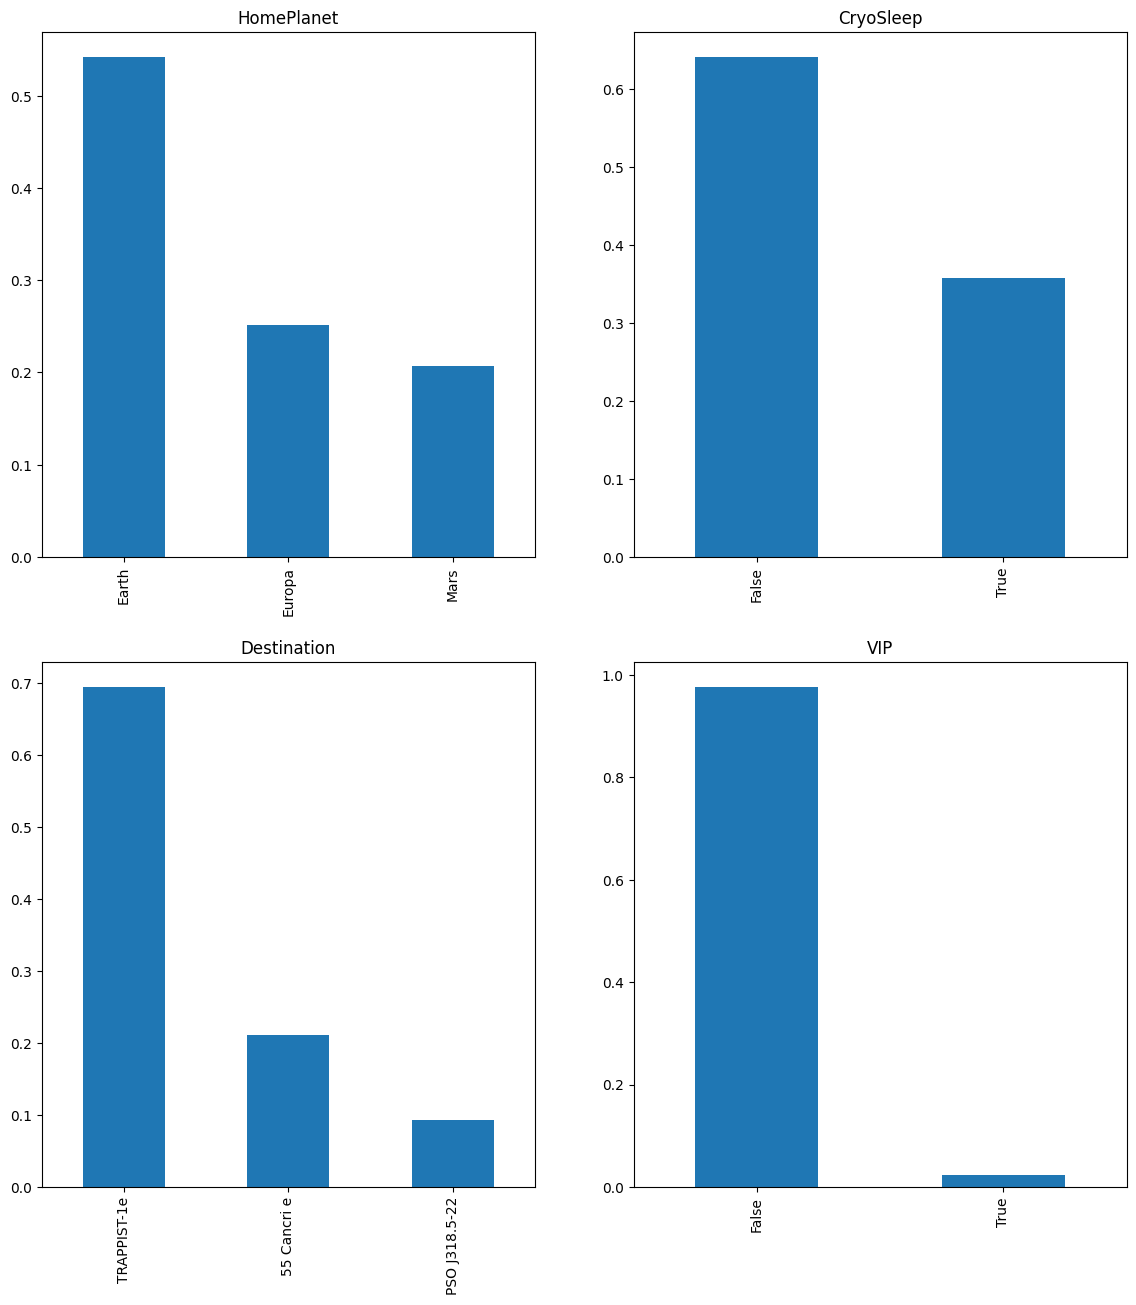

In [ ]:
plt.figure(figsize = (14, 15))
plt.subplot(221)
train_df['HomePlanet'].value_counts(normalize = True).plot.bar(title = 'HomePlanet')
plt.subplot(222)
train_df['CryoSleep'].value_counts(normalize = True).plot.bar(title = 'CryoSleep')
plt.subplot(223)
train_df['Destination'].value_counts(normalize = True).plot.bar(title = 'Destination')
plt.subplot(224)
train_df['VIP'].value_counts(normalize = True).plot.bar(title = 'VIP')

<Axes: title={'center': 'CabinSide'}>

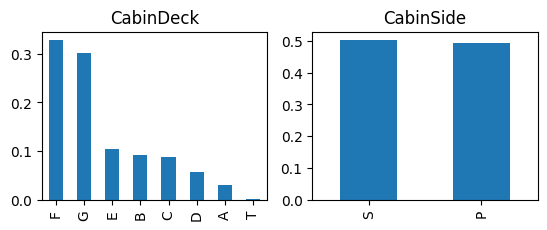

In [ ]:
train_df_copy[["CabinDeck", "CabinNo.", "CabinSide"]] = train_df_copy["Cabin"].str.split('/', expand = True)

# Visualize cabin feature
plt.figure()
plt.subplot(221)
train_df_copy['CabinDeck'].value_counts(normalize = True).plot.bar(title = 'CabinDeck')
plt.subplot(222)
train_df_copy['CabinSide'].value_counts(normalize = True).plot.bar(title = 'CabinSide')


In [ ]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of people with/without heart disease
df_tot = train_df['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Not Transported','Transported']
);

# Counts of patients with heart disease, by sext
df_trans = train_df.HomePlanet[train_df['Transported']==True].value_counts()

# Counts of patients without heart disease, by sex
df_ntrans = train_df.HomePlanet[train_df['Transported']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_trans_by_HomePlanet = np.concatenate((np.array(df_trans),np.array(df_ntrans)))

# Inner pie chart (to show sub-distribution of "Sex")
ax.pie(
    df_trans_by_HomePlanet,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Earth','Europa','Mars', 'Earth', 'Europa', 'Mars']
);


In [ ]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of people with/without heart disease
df_tot = train_df['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Not Transported','Transported']
);

# Counts of patients with heart disease, by sext
df_trans = train_df.CryoSleep[train_df['Transported']==True].value_counts()

# Counts of patients without heart disease, by sex
df_ntrans = train_df.CryoSleep[train_df['Transported']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_trans_by_CryoSleep = np.concatenate((np.array(df_trans),np.array(df_ntrans)))

# Inner pie chart (to show sub-distribution of "Sex")
ax.pie(
    df_trans_by_CryoSleep,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['False','True','False', 'True']
);


In [ ]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of people with/without heart disease
df_tot = train_df['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Not Transported','Transported']
);

# Counts of patients with heart disease, by sext
df_trans = train_df.Destination[train_df['Transported']==True].value_counts()

# Counts of patients without heart disease, by sex
df_ntrans = train_df.Destination[train_df['Transported']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_trans_by_dest = np.concatenate((np.array(df_trans),np.array(df_ntrans)))

# Inner pie chart (to show sub-distribution of "Sex")
ax.pie(
    df_trans_by_dest,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['55 Cancri e','PSO J318.5-22','TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']
);


In [ ]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of people with/without heart disease
df_tot = train_df['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Not Transported','Transported']
);

# Counts of patients with heart disease, by sext
df_trans = train_df.VIP[train_df['Transported']==True].value_counts()

# Counts of patients without heart disease, by sex
df_ntrans = train_df.VIP[train_df['Transported']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_trans_by_VIP = np.concatenate((np.array(df_trans),np.array(df_ntrans)))

# Inner pie chart (to show sub-distribution of "Sex")
ax.pie(
    df_trans_by_VIP,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['False','True','False', 'True']
);


In [ ]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of people with/without heart disease
df_tot = train_df['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Not Transported','Transported']
);

# Counts of patients with heart disease, by sext
df_trans = train_df_copy.CabinDeck[train_df['Transported']==True].value_counts()

# Counts of patients without heart disease, by sex
df_ntrans = train_df_copy.CabinDeck[train_df['Transported']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_trans_by_CabinDeck = np.concatenate((np.array(df_trans),np.array(df_ntrans)))

# Inner pie chart (to show sub-distribution of "Sex")
ax.pie(
    df_trans_by_CabinDeck,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['B','C','G','A','F','D','E','T','B','C','G','A','F','D','E','T'],
    textprops = {'fontsize':6}
);



In [ ]:
plt.figure()
sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'Age')
sns.despine(left = True)
plt.show()

sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'RoomService')
sns.despine(left = True)
plt.show()

sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'FoodCourt')
sns.despine(left = True)
plt.show()

sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'ShoppingMall')
sns.despine(left = True)
plt.show()

sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'Spa')
sns.despine(left = True)
plt.show()

sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'VRDeck')
sns.despine(left = True)

plt.show()

In [ ]:
plt.figure(1)
plt.subplot(331)
sns.distplot(train_df['Age']);
plt.subplot(332)
sns.distplot(train_df['RoomService']);
plt.subplot(333)
sns.distplot(train_df['FoodCourt']);
plt.subplot(334)
sns.distplot(train_df['ShoppingMall']);
plt.subplot(335)
sns.distplot(train_df['Spa']);
plt.subplot(336)
sns.distplot(train_df['VRDeck']);
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.5, hspace=0.5)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
train_copy_2 = train_df_copy.copy()
train_copy_2 = train_copy_2.drop(['CabinDeck', 'CabinSide', 'CabinNo.'], axis = 1)


NameError: name 'train_df_copy' is not defined

In [ ]:
train_data_1 = train_copy_2.drop(['Transported'], axis = 1)


In [ ]:
data = pd.concat([train_data_1, test_df], axis=0).reset_index(drop= True)


NameError: name 'pd' is not defined

In [ ]:
def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):
  df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].quantile(quantile)
    for num_column in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
    return df

data = clipping_quantile(data, None, 0.99)
print(data.head(3))


SyntaxError: incomplete input (<ipython-input-6-1cb772b24879>, line 1)

In [ ]:
print(f"Column names: {list(data.columns)} \n")

print(f"data shape: {data.shape} \n")

print(f"data columns datatypes: {data.dtypes} \n")

print(f"missing values: {data.isnull().sum()} \n")

#Filling Numerical NANs
def fill_missing_values_numerical(column_names):
    for column in column_names:
        data[column].fillna(data[column].mean(), inplace=True)


columns_to_fill = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]  # Add other column names here
fill_missing_values_numerical(columns_to_fill)

#Filling Categorical NANs
def fill_missing_values_categorical(column_names):
    for column in column_names:
        data[column].fillna(data[column].mode()[0], inplace=True)

columns_to_fill = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']  # Add other column names here
fill_missing_values_categorical(columns_to_fill)

print(f"missing values: {data.isnull().sum()} \n")

def extract_features(df):
    # Create CabinDeck feature
    df["CabinDeck"] = df["Cabin"].str.split('/', expand = True)[0]
    # Create DeckPosition feature
    df["DeckPosition"] = df["CabinDeck"].apply(lambda deck: "Lower" if deck in ('A', 'B', 'C', 'D') else "Higher" )
    # Create CabinSide feature
    df["CabinSide"] = df["Cabin"].str.split('/', expand = True)[2]

    # Create Regular feature
    df["Regular"] = df["FoodCourt"] + df["ShoppingMall"]
    # Create Luxury feature
    df["Luxury"] = df["RoomService"] + df["Spa"] + df["VRDeck"]
    # Create TotalSpendings feature
    df["TotalSpendings"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

    Wealthiest_Deck = df.groupby('CabinDeck').aggregate({'TotalSpendings': 'sum', 'PassengerId': 'size'}).reset_index()
    # Create DeckAverageSpent feature
    Wealthiest_Deck['DeckAverageSpent'] = Wealthiest_Deck['TotalSpendings'] / Wealthiest_Deck['PassengerId']

    df = df.merge(Wealthiest_Deck[["CabinDeck", "DeckAverageSpent"]], how = 'left', on = ['CabinDeck'])

    return df

data_copy = data.copy()
data_model = extract_features(data_copy)
print(data_model.head(3))

IndentationError: unexpected indent (<ipython-input-7-87803f85d0da>, line 2)

In [ ]:
irrelevant_columns = ["Cabin","Name"]
data_model = data_model.drop(irrelevant_columns, axis = 1)
print(f"data columns datatypes: {data_model.dtypes} \n")

In [ ]:
 Categorical One-Hot Encoding
data_model = pd.get_dummies(data_model, columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinSide'])

#Ordinal Encoding
for col in ['CabinDeck', 'DeckPosition']:
    data_model[col], _ = data_model[col].factorize()

In [ ]:
train_data_model = data_model.loc[:train_df.index.max(),  :].copy()
test_data_model = data_model.loc[train_df.index.max() + 1:, :].reset_index(drop = True).copy()

print(f'train_data_model shape: {train_data_model.shape}\n')
print(f'test_data_model shape: {test_data_model.shape}\n')
train_data model shape
test_data_model shape:(4277,25)

In [ ]:
x = train_data_model.copy()
target = train_df['Transported']
# save target variable in in y
y = target.astype(int)
print(x.columns)

In [ ]:
Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'DeckPosition', 'Regular', 'Luxury', 'TotalSpendings',
       'DeckAverageSpent', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_TRAPPIST-1e', 'VIP_True',
       'CabinSide_P', 'CabinSide_S'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

x = x[chi_feature]

# baseline model
baseline_model = RandomForestClassifier(random_state = 1)
baseline_model.fit(x, y)

In [ ]:

RandomForestClassifier
RandomForestClassifier(random_state=1)

In [ ]:
from sklearn.model_selection import cross_val_score

# store accuracy of baseline model prediction in results
result = cross_val_score(baseline_model, x, y, cv = 20, scoring = "accuracy")

# print mean and standard deviation of baseline model
print(np.mean(result))
print(np.std(result))

# Model Evaluation and Improvement

In [ ]:
from sklearn.model_selection import cross_val_score

# finding accuracy of baseline model prediction
result = cross_val_score(baseline_model, x, y, cv = 20, scoring = "accuracy")

# print mean accuracy of of baseline model
print(np.mean(result))

In [ ]:
from sklearn.model_selection import GridSearchCV

# provide range for max_depth from 1 to 20 with an interval of 2
# provide range for n_estimators from 1 to 200 with an interval of 20
paramgrid = {'max_depth': list(range(1, 20, 2)),
             'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)

# fit the grid search model
grid_search.fit(x, y)

# Estimating the optimized value
grid_search.best_estimator_

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
# build final model with these optimized values
model_final = RandomForestClassifier(max_depth=5, n_estimators=161, random_state=1)

# fit model on X and y
model_final.fit(x, y)

In [ ]:
#Finding accuracy after adjusting hyperparameters
result1 = cross_val_score(model_final, x, y, cv = 20, scoring = "accuracy")

#Finding mean accuracy of the final model
print(np.mean(result1))

In [ ]:
prediction = model_final.predict(test_data_model[chi_feature])

In [ ]:
# store predictions in a dataframe
pred_dict = {"PassengerId" : test_df["PassengerId"], "Transported": prediction}
pred_df = pd.DataFrame(pred_dict)

# replacing 0 with False and 1 with True
pred_df["Transported"] = pred_df["Transported"].map({1 : True, 0: False})
print(pred_df.head(5))

# Explainable AI

In [ ]:
!pip install eli5
import eli5

In [ ]:
from eli5.sklearn import PermutationImportance

#Permutation Importance for xai
perm = PermutationImportance(model_final).fit(x,y)
eli5.show_weights(perm, feature_names = list(x.columns))